<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/Audio_classification_feature_extraction_vgg16_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
os.chdir('/content/drive/MyDrive/audio-features')
print(os.getcwd())

/content/drive/MyDrive/audio-features


In [ ]:
features = np.load('train_feature_x_batch_1.npy', allow_pickle=True)
labels = np.load('train_label_y_batch_1.npy', allow_pickle=True)
for i in range(2,61):
  file_name_x =  f'train_feature_x_batch_{i}.npy'
  file_name_y = f'train_label_y_batch_{i}.npy'
  # print("------------------------------------------------")
  # print(file_name_x)
  # print(file_name_y)
  features_new =  np.load(file_name_x, allow_pickle=True)
  lebels_new = np.load(file_name_y, allow_pickle=True)
  features = np.concatenate((features, features_new), axis=0)
  labels = np.concatenate((labels,lebels_new))
  print(i)
  # print("------------------------------------------------")
  del features_new
  del lebels_new

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [ ]:
features_test = np.load('train_feature_x_batch_122.npy', allow_pickle=True)
labels_test = np.load('train_label_y_batch_122.npy', allow_pickle=True)
for i in range(122,127):
  file_name_x =  f'train_feature_x_batch_{i}.npy'
  file_name_y = f'train_label_y_batch_{i}.npy'
  print(file_name_x)
  print(file_name_y)
  features_new =  np.load(file_name_x, allow_pickle=True)
  lebels_new = np.load(file_name_y, allow_pickle=True)
  features_test = np.concatenate((features_test, features_new), axis=0)
  labels_test = np.concatenate((labels_test,lebels_new))
  print(i)
  del features_new
  del lebels_new

train_feature_x_batch_122.npy
train_label_y_batch_122.npy
122
train_feature_x_batch_123.npy
train_label_y_batch_123.npy
123
train_feature_x_batch_124.npy
train_label_y_batch_124.npy
124
train_feature_x_batch_125.npy
train_label_y_batch_125.npy
125
train_feature_x_batch_126.npy
train_label_y_batch_126.npy
126


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Example list of categories


# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape the list into a 2D array
y_train = np.array(labels).reshape(-1, 1)
y_test = np.array(labels_test).reshape(-1, 1)

# Fit and transform the data using the encoder
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
# Print the one-hot encoded array
# print(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_train.shape
y_test[11]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
mobilnet = VGG16(input_shape=(128,300,3),
                 weights='imagenet',
                 #weights=None ,
                 include_top=False)



for layer in mobilnet.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
last_output = mobilnet.output
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)

# Add a final sigmoid layer for classification
x = layers.Dense  (45, activation='softmax')(x)

model = Model( mobilnet.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved_mode_30.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')

In [ ]:
history = model.fit(features, y_train, epochs=300,
                    batch_size=32,
                       callbacks=[checkpoint],
                       validation_data= (features_test, y_test))

Epoch 1/300
844/844 [==============================] - ETA: 0s - loss: 3.8111 - accuracy: 0.0204
Epoch 1: val_accuracy improved from -inf to 0.02272, saving model to saved_mode_30.h5
844/844 [==============================] - 37s 31ms/step - loss: 3.8111 - accuracy: 0.0204 - val_loss: 3.8067 - val_accuracy: 0.0227
Epoch 2/300
843/844 [============================>.] - ETA: 0s - loss: 3.8076 - accuracy: 0.0212
Epoch 2: val_accuracy did not improve from 0.02272
844/844 [==============================] - 19s 23ms/step - loss: 3.8077 - accuracy: 0.0212 - val_loss: 3.8064 - val_accuracy: 0.0227
Epoch 3/300
844/844 [==============================] - ETA: 0s - loss: 3.8072 - accuracy: 0.0216
Epoch 3: val_accuracy improved from 0.02272 to 0.02651, saving model to saved_mode_30.h5
844/844 [==============================] - 21s 25ms/step - loss: 3.8072 - accuracy: 0.0216 - val_loss: 3.8053 - val_accuracy: 0.0265
Epoch 4/300
844/844 [==============================] - ETA: 0s - loss: 3.7981 - accu

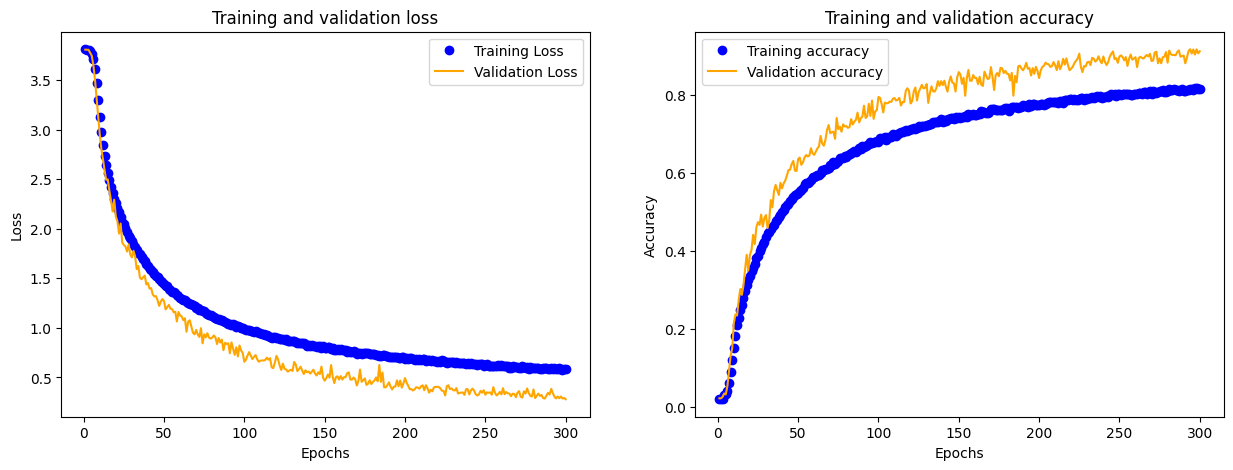

In [ ]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,301)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
model.load_weights('saved_mode_30.h5')

[INFO] Calculating model accuracy


In [ ]:
Y_pred = model.predict(features_test)


83/83 [==============================] - 2s 17ms/step


In [ ]:
Y_pred_for_conf = np.argmax(Y_pred,axis =1)
y_test_for_conf = np.argmax(y_test, axis =1)

In [ ]:
all_class = np.unique(labels_test)
all_class

array(['1', '10', '11', '12', '14', '15', '16', '17', '18', '19', '2',
       '25', '26', '27', '3', '4', '47', '48', '5', '55', '56', '57',
       '58', '6', '61', '70', '8', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95',
       '98'], dtype='<U2')

In [ ]:
classes = ['1', '10', '11', '12', '14', '15', '16', '17', '18', '19', '2',
       '25', '26', '27', '3', '4', '47', '48', '5', '55', '56', '57',
       '58', '6', '61', '70', '8', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95',
       '98']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_for_conf, Y_pred_for_conf, target_names=classes))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        58
          10       1.00      0.82      0.90        60
          11       0.91      0.98      0.95        62
          12       0.92      0.98      0.95        58
          14       0.97      0.98      0.98        60
          15       0.68      0.72      0.70        60
          16       0.97      0.94      0.95        62
          17       1.00      0.91      0.95        58
          18       0.95      0.94      0.94        62
          19       0.98      0.84      0.91        58
           2       1.00      0.87      0.93        60
          25       0.89      0.89      0.89        62
          26       0.90      0.98      0.94        58
          27       0.90      0.92      0.91        59
           3       0.97      0.97      0.97        60
           4       1.00      0.98      0.99        62
          47       0.95      1.00      0.98        60
          48       0.96    

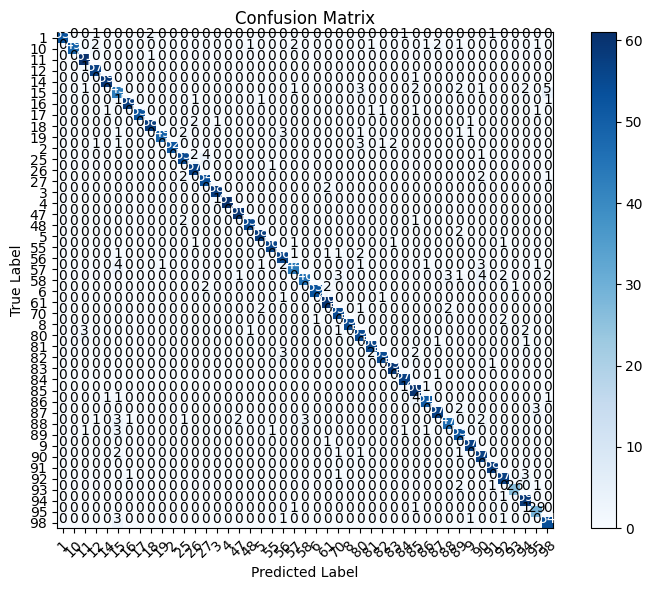

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have ground truth labels and predicted labels stored in variables
# y_true: Ground truth labels
# y_pred: Predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test_for_conf, Y_pred_for_conf)

# Create a list of class labels


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix if desired
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Format and display the actual values in the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [ ]:
print(cm)

[[53  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  1  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 29  0]
 [ 0  0  0 ...  0  0 54]]


In [ ]:
np.savetxt("/content/drive/MyDrive/outputs/confusion_matrix_attempt2_vgg16_60.csv", cm, delimiter=",")